# Import File and Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import datetime as dt

In [3]:
# Read file in as Pandas dataframe

df = pd.read_csv('kc2_house_data.csv')
df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,lat,long,yrs_old
0,221900.0,3,1.00,1.0,0.0,0.0,3,7,98178,47.5112,-122.257,59
1,538000.0,3,2.25,2.0,0.0,0.0,3,7,98125,47.7210,-122.319,63
2,180000.0,2,1.00,1.0,0.0,0.0,3,6,98028,47.7379,-122.233,82
3,604000.0,4,3.00,1.0,0.0,0.0,5,7,98136,47.5208,-122.393,49
4,510000.0,3,2.00,1.0,0.0,0.0,3,8,98074,47.6168,-122.045,28


# Feature Engineering

## Engineering Distance From City Using Haversine Package

In [4]:
# Import haversine package and define city centers with their grid coordinates 

from haversine import haversine

seattle = [47.6092, -122.3363]
bellevue = [47.61555, -122.20392]

In [5]:
# Check haversine functionality

haversine(seattle, bellevue, unit ='mi')

6.181695095872431

In [6]:
# Zip lat and long columns into single column 

df['lat_long'] = tuple(zip(df.lat, df.long))

In [7]:
# Initialize lists to store values and calculate distances from entry locations to city 
# centers. 

seattle_distances = []
for i in df['lat_long']:
    seattle_distances.append(haversine((seattle), (i), unit = 'mi'))
df['distance_from_seattle'] = pd.Series(seattle_distances)

bellevue_distances = []
for i in df['lat_long']:
    bellevue_distances.append(haversine((bellevue), (i), unit = 'mi'))
df['distance_from_bellevue'] = pd.Series(bellevue_distances)

In [8]:
# Define distance from city as minimum distance between entry and city centers

df['distance_from_city'] = df[['distance_from_bellevue', 'distance_from_seattle']].min(axis = 1)

In [9]:
df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,lat,long,yrs_old,lat_long,distance_from_seattle,distance_from_bellevue,distance_from_city
0,221900.0,3,1.00,1.0,0.0,0.0,3,7,98178,47.5112,-122.257,59,"(47.5112, -122.257)",7.714868,7.622786,7.622786
1,538000.0,3,2.25,2.0,0.0,0.0,3,7,98125,47.7210,-122.319,63,"(47.721, -122.319)",7.766476,9.041882,7.766476
2,180000.0,2,1.00,1.0,0.0,0.0,3,6,98028,47.7379,-122.233,82,"(47.7379, -122.233)",10.107949,8.561145,8.561145
3,604000.0,4,3.00,1.0,0.0,0.0,5,7,98136,47.5208,-122.393,49,"(47.5208, -122.393)",6.655340,10.979730,6.655340
4,510000.0,3,2.00,1.0,0.0,0.0,3,8,98074,47.6168,-122.045,28,"(47.6168, -122.045)",13.578402,7.402273,7.402273


In [10]:
# Check correlation between new features

df.corr()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,lat,long,yrs_old,distance_from_seattle,distance_from_bellevue,distance_from_city
price,1.000000,0.295275,0.440243,0.269486,0.051813,0.213120,0.033946,0.617743,-0.019540,0.440556,0.078359,-0.058760,-0.307667,-0.462067,-0.446591
bedrooms,0.295275,1.000000,0.499567,0.157301,-0.027363,0.031535,0.023294,0.330037,-0.159746,-0.040259,0.152238,-0.173569,0.111583,-0.000775,0.055840
bathrooms,0.440243,0.499567,1.000000,0.504069,-0.006228,0.080674,-0.139028,0.608200,-0.214744,-0.017705,0.253839,-0.554380,0.159694,0.024160,0.071443
floors,0.269486,0.157301,0.504069,1.000000,-0.006607,-0.018082,-0.278563,0.457574,-0.067107,0.032878,0.137363,-0.515483,0.031930,-0.006577,-0.011586
waterfront,0.051813,-0.027363,-0.006228,-0.006607,1.000000,0.282320,0.011941,-0.013079,0.043204,-0.041654,-0.055363,0.034956,0.008376,0.034680,0.021937
view,0.213120,0.031535,0.080674,-0.018082,0.282320,1.000000,0.030999,0.114924,0.101812,-0.032596,-0.077136,0.068833,-0.029568,0.021032,-0.007603
condition,0.033946,0.023294,-0.139028,-0.278563,0.011941,0.030999,1.000000,-0.174140,-0.007297,-0.019368,-0.097726,0.350477,-0.061528,-0.037051,-0.041677
grade,0.617743,0.330037,0.608200,0.457574,-0.013079,0.114924,-0.174140,1.000000,-0.189264,0.077587,0.233792,-0.499014,0.088912,-0.069093,-0.023782
zipcode,-0.019540,-0.159746,-0.214744,-0.067107,0.043204,0.101812,-0.007297,-0.189264,1.000000,0.278169,-0.562575,0.343717,-0.551706,-0.256459,-0.388578
lat,0.440556,-0.040259,-0.017705,0.032878,-0.041654,-0.032596,-0.019368,0.077587,0.278169,1.000000,-0.132221,0.156686,-0.609651,-0.716098,-0.703762


In [11]:
# Drop columns that are now highly correlated with engineered feature

df.drop(['lat', 'long', 'lat_long', 'distance_from_seattle', 'distance_from_bellevue'], axis = 1, inplace = True)

In [12]:
df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,yrs_old,distance_from_city
0,221900.0,3,1.00,1.0,0.0,0.0,3,7,98178,59,7.622786
1,538000.0,3,2.25,2.0,0.0,0.0,3,7,98125,63,7.766476
2,180000.0,2,1.00,1.0,0.0,0.0,3,6,98028,82,8.561145
3,604000.0,4,3.00,1.0,0.0,0.0,5,7,98136,49,6.655340
4,510000.0,3,2.00,1.0,0.0,0.0,3,8,98074,28,7.402273


In [13]:
df.isnull().sum()

price                 0
bedrooms              0
bathrooms             0
floors                0
waterfront            0
view                  0
condition             0
grade                 0
zipcode               0
yrs_old               0
distance_from_city    0
dtype: int64

## Bin Zip Codes into School Districts

In [14]:
df['zipcode'].nunique()

70

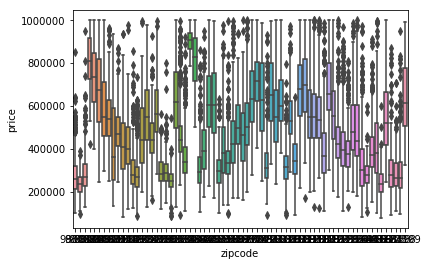

In [15]:
sns.boxplot(x = df['zipcode'], y = df['price'])

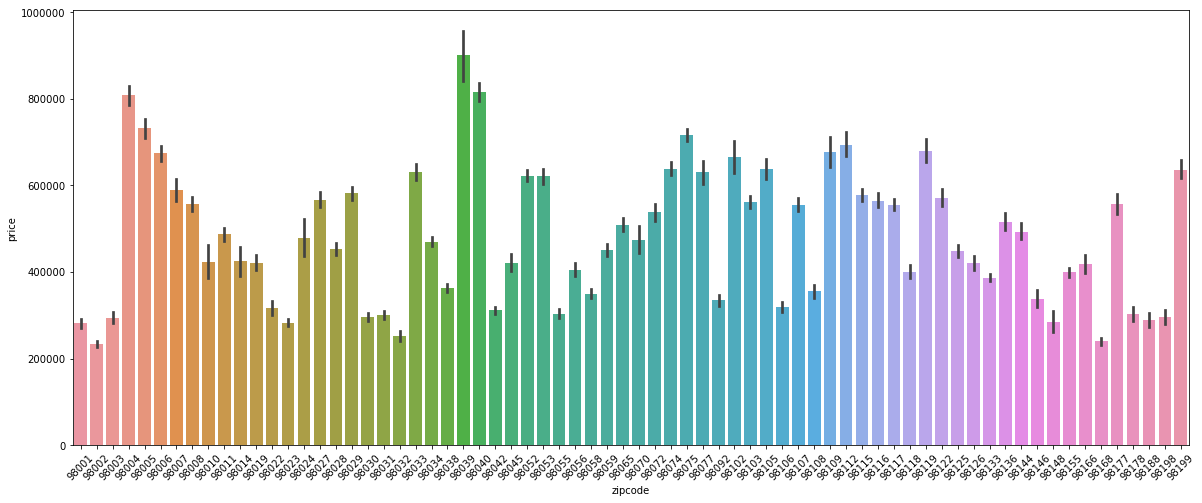

In [16]:
# Examine relationship between zipcode and price using barplot

plt.figure(figsize=(20,8))
zc = sns.barplot(x = 'zipcode', y ='price', data = df)
for item in zc.get_xticklabels():
    item.set_rotation(45)

In [17]:
# Bin zipcodes into school districts using King County school district map

def group_zips(z):
    if z in [98177, 98133, 98125, 98155]:
        return 'Shoreline'
    
    elif z in [98028, 98011, 98072, 98077]:
        return 'Northshore'
    
    elif z in [98019, 98014]:
        return 'Riverview'
    
    elif z in [98117, 98103, 98115, 98107, 98105, 98199, 98119, 98109, 98102, 
               98112, 98122, 98116, 98136, 98126,
               98106, 98144, 98108, 98118]:
        return 'Seattle'
    
    elif z in [98040]:
        return 'MercerIsland'
    
    elif z in [98034, 98052, 98053, 98033, 98074]:
        return 'LakeWashington'
    
    elif z in [98039, 98004, 98005, 98007, 98008, 98006]:
        return 'Bellevue'
    
    elif z in [98059, 98027, 98075, 98029]:
        return 'Issaquah'
    
    elif z in [98024, 98065, 98045]:
        return 'SnoqualmieValley'
    
    elif z in [98168]:
        return 'Tukwila'
    
    elif z in [98178, 98056, 98055]:
        return 'Renton'
    
    elif z in [98070]:
        return 'VashonIsland'
    
    elif z in [98146, 98166, 98148, 98188]:
        return 'Highline'
    
    elif z in [98198, 98023, 98003, 98001]:
        return 'FederalWay'
    
    elif z in [98032, 98031, 98030, 98042, 98058]:
        return 'Kent'
    
    elif z in [98002, 98092]:
        return 'Auburn'
    
    elif z in [98038]:
        return 'Tahoma'
    
    elif z in [98022, 98010]:
        return 'Enumclaw'

In [18]:
df['zipcode'] = df['zipcode'].map(group_zips)

In [19]:
df['zipcode'].head()

0            Renton
1         Shoreline
2        Northshore
3           Seattle
4    LakeWashington
Name: zipcode, dtype: object

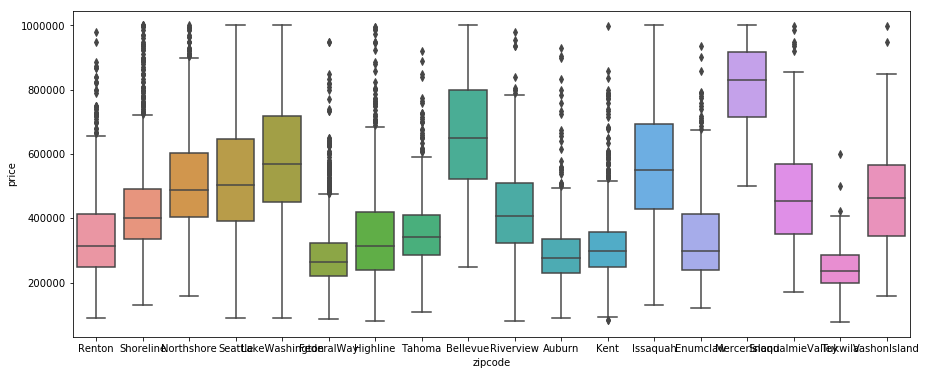

In [32]:
# Examine school district relationship with price for linearity

plt.figure(figsize = (15,6))
sns.boxplot(x = 'zipcode', y = 'price', data = df)

In [27]:
grouped_zip = df.loc[:,['zipcode', 'price']].groupby(['zipcode']).median().sort_values(by = 'price')

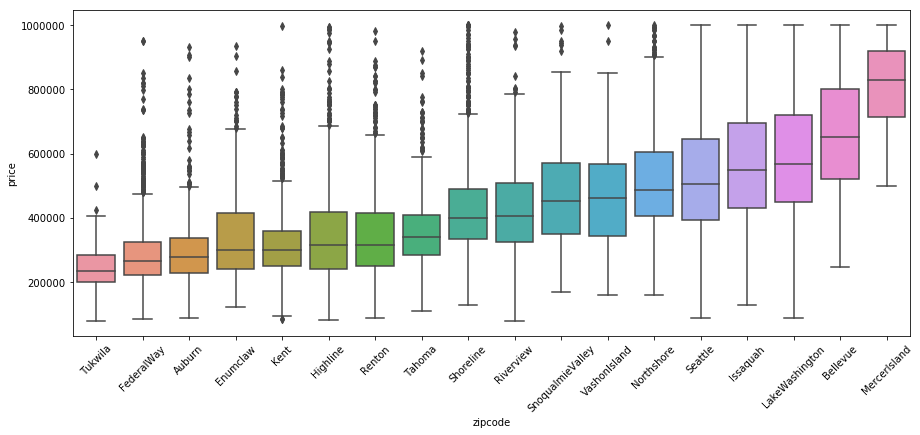

In [35]:
plt.figure(figsize = (15,6))
gz = sns.boxplot(x = 'zipcode', y = 'price', data = df, order = grouped_zip.index)
for item in gz.get_xticklabels():
    item.set_rotation(45)

## One Hot Encode Categorical Variables

In [83]:
# One hot encode zip code engineered feature for use in regression model

from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()
ohe = ohc.fit_transform(df.zipcode.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(ohe, columns = ['SD_' + str(ohc.categories_[0][i]) for i in range(len(ohc.categories_[0]))])
dfh = pd.concat([df, dfOneHot], axis = 1)
dfh.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,distance_from_city,...,SD_MercerIsland,SD_Northshore,SD_Renton,SD_Riverview,SD_Seattle,SD_Shoreline,SD_SnoqualmieValley,SD_Tahoma,SD_Tukwila,SD_VashonIsland
0,221900.0,3,1.00,1.0,0.0,0.0,3,7,Renton,7.622786,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,538000.0,3,2.25,2.0,0.0,0.0,3,7,Shoreline,7.766476,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,180000.0,2,1.00,1.0,0.0,0.0,3,6,Northshore,8.561145,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,4,3.00,1.0,0.0,0.0,5,7,Seattle,6.655340,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,3,2.00,1.0,0.0,0.0,3,8,LakeWashington,7.402273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
# Drop original zipcode column to prevent multicollinearity with new engineered column 

dfh.drop(['zipcode'], axis = 1, inplace = True)

In [85]:
# Save file to continue work in another notebook

dfh.to_csv('kc3_house_data.csv', index = False)